# Dictionaries 2 - Combining Dictionaries and Lists (nested data structures)

In [1]:
import csv

### Warmup 1: Answer these questions about dictionaries

In [2]:
# Keys can be what type? :     Any type that is ____immutable____________
# Values can be what type? :   any type (including other dictionaries)
# Indexing? .... yes/no        No
# Slicing? ..... yes/no        No
# Mutable?......yes/no         Yes

In [3]:
# inspired by https://automatetheboringstuff.com/2e/chapter16/
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")  
    exampleReader = csv.reader(exampleFile) 
    exampleData = list(exampleReader)        
    exampleFile.close()  
    return exampleData

survey_data = process_csv('cs220_survey_data.csv')

### Warmup 2a: Split csv data into header and data

In [4]:
cs220_header = survey_data[0]
cs220_data = survey_data[1:]
cs220_header

['Lecture',
 'Age',
 'Primary major',
 'Other majors',
 'Zip Code',
 'Pizza topping',
 'Pet owner',
 'Runner',
 'Sleep habit',
 'Procrastinator']

### Warmup 2b: Display the first 3 data rows

In [5]:
cs220_data[:3]

[['LEC002',
  '19',
  'Engineering: Mechanical',
  '',
  '53711',
  'pepperoni',
  'Yes',
  'No',
  'night owl',
  'Maybe'],
 ['LEC002',
  '20',
  'Science: Physics',
  'Astronomy-Physics, History',
  '53726',
  'pineapple',
  'Yes',
  'Yes',
  'night owl',
  'Yes'],
 ['LEC001',
  '20',
  'Science: Chemistry',
  '',
  '53703',
  'pepperoni',
  'Yes',
  'No',
  'early bird',
  'No']]

In [6]:
def cell(row_idx, col_name):
    """
    Returns the data value (cell) corresponding to the row index and 
    the column name of a CSV file.
    """
    col_idx = cs220_header.index(col_name) 
    val = cs220_data[row_idx][col_idx]  
    
    # handle missing values, by returning None
    if val == '':
        return None
    
    # handle type conversions
    if col_name in ["Age",]:
        return int(val)
    
    return val

### Warmup 3: Make a dictionary of frequency of 'Primary major'

- Initialize empty `dict` into a variable called `major_freq`
- Iterate over the data:
    - Extract required column's data
    - Make sure to handle missing data
    - Check if current value of the column is a key in your `dict`:
        - yes, update the count
        - no, insert new key-value pair

In [7]:
# TODO: iterate over each student's data from cs220_data
# TODO: extract "Primary major" column's value 
# TODO: check if current student's major already a key in major_freq
#            - if yes, increase the corresponding value by 1
#            - if no, insert a new key-value pair

major_freq = {} # KEY: unique major; VALUE: count of unique major

for row in cs220_data:
    major = row[cs220_header.index("Primary major")]
    if major in major_freq:
        major_freq[major] += 1
    else:
        major_freq[major] = 1
    
major_freq

{'Engineering: Mechanical': 110,
 'Science: Physics': 12,
 'Science: Chemistry': 6,
 'Engineering: Biomedical': 70,
 'Other': 77,
 'Statistics': 35,
 'Mathematics/AMEP': 21,
 'Data Science': 81,
 'Business: Finance': 23,
 'Engineering: Other': 36,
 'Computer Science': 81,
 'Science: Other': 22,
 'Languages': 1,
 'Business: Information Systems': 26,
 'Business: Actuarial': 19,
 'Engineering: Industrial': 41,
 'Science: Biology/Life': 33,
 'Business: Other': 26}

### What is the most common Primary major among CS220 / CS319 students?

In [8]:
most_used_key = None  
max_value = None

for major in major_freq:
    if max_value == None or major_freq[major] > max_value:
        max_value = major_freq[major]
        most_used_key = major

print("The major \"{}\" appeared {} times.".format(str(most_used_key), max_value))

The major "Engineering: Mechanical" appeared 110 times.


### Learning Objectives:
 - Handle key errors with get and pop using default values
 - Understand the idea of nesting data structures
 - Use a dictionary of lists to put rows of data into "buckets"
 - Use a list of dictionaries to represent a table of data.
 - Create a dictionary of dictionaries

### Default values with `get` and `pop` methods.

In [9]:
suffix = {1: "st", 2: 'nd', 3: "rd"}
suffix.get(1)

# TODO: what happens when you try to get a key that is not there? Try it.
print(suffix.get(10)) # Returns None

# TODO: what happens whey you try to pop a key that is not there? Try it.
# suffix.pop(10) # KeyError

None


`get` and `pop` methods accept a second argument, which will be the default value if the first argument (key) does not exist.

Syntax:
- `some_dict.get(some_key, default_value)`
- `some_dict.pop(some_key, default_value)`

In [10]:
# get(key, default value) 
print(suffix.get(3, 'th'))
print(suffix.get(5, 'th')) #default value, but does not add the key-value pair to the dict

# pop(key, default value)
print(suffix.pop(7, 'th')) # no key-value pair to remove
print(suffix.pop(2, 'th'))
print(suffix)

rd
th
th
nd
{1: 'st', 3: 'rd'}


### What are nested data structures?
A data structure containing another data structure as item is called as nest data structure.

## Nesting part 1: Bucketizing/Binning

<div>
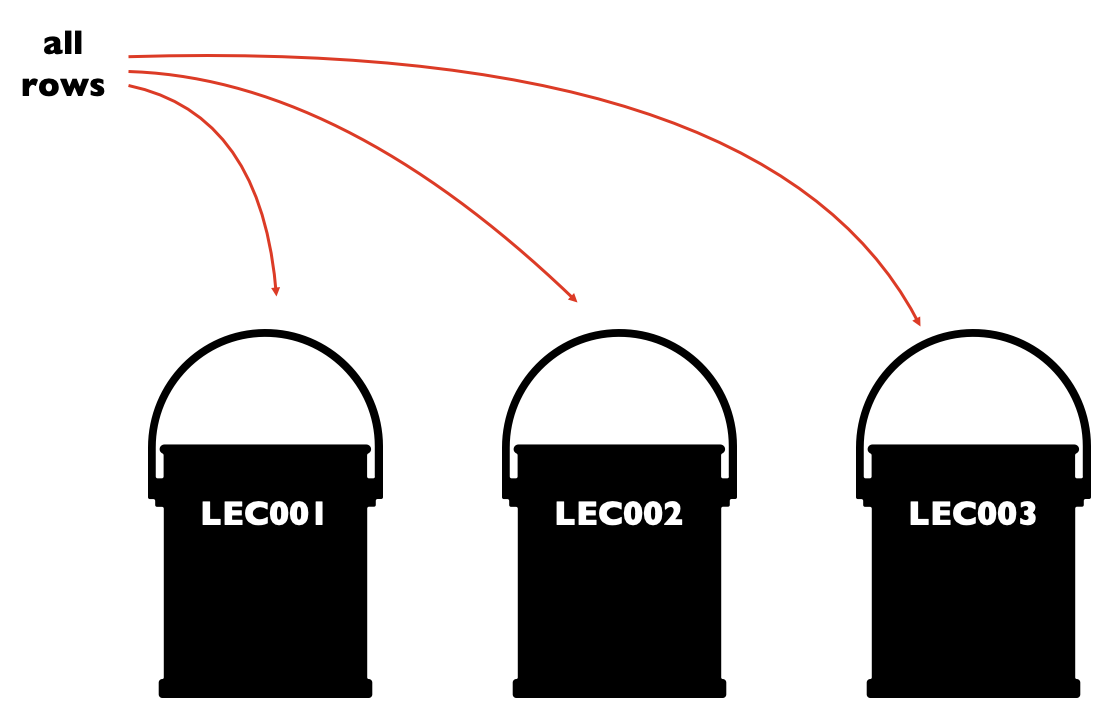
</div>

<div>
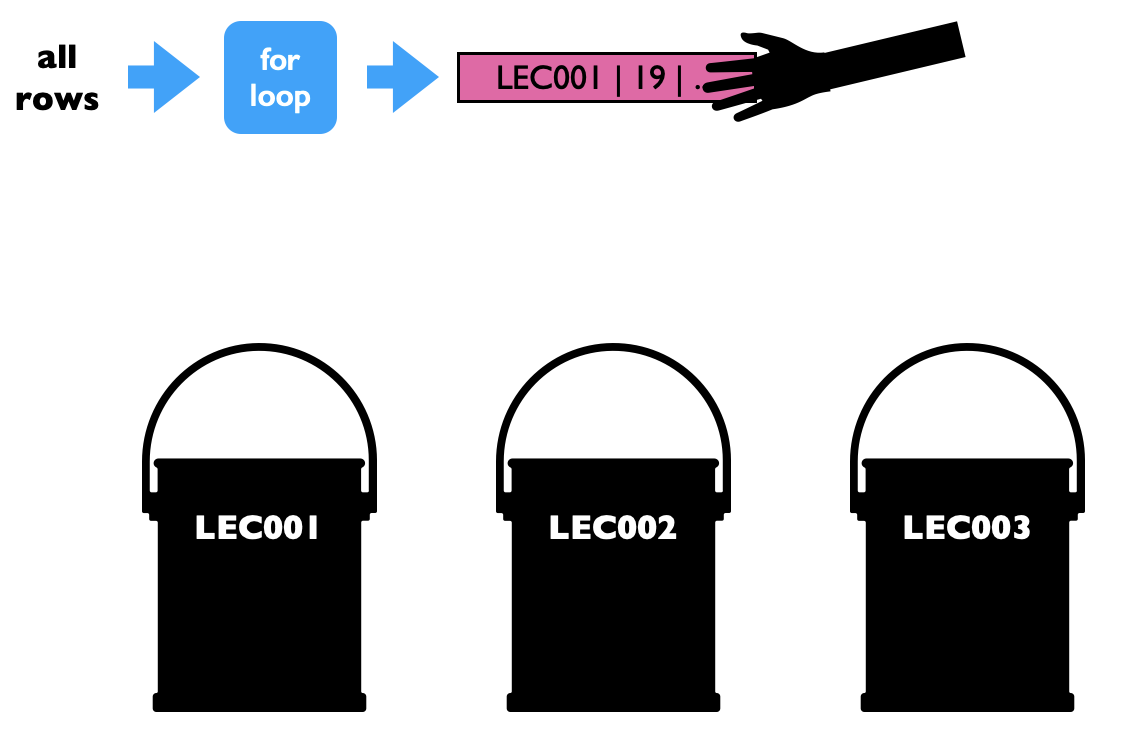
</div>

<div>
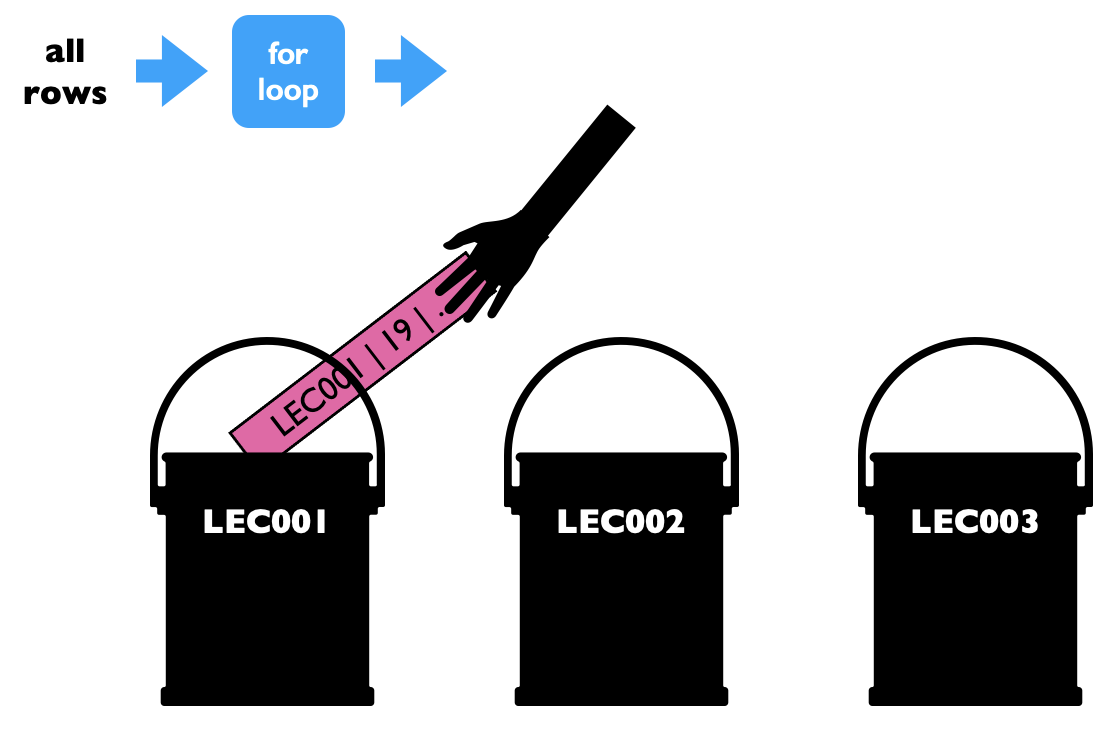
</div>

Bucketizing/Binning process objective: build dict of list of lists data structure
- Initialize an empty `dict`
- Iterate over every row in your dataset
    - Retrieve value of the column based on which you want to bucketize
    - Check if bucketizing column is already a key in your `dict`:
        - if no, insert a new key-value pair:
            - key: unique value of bucktizing column
            - value: initialize a new list, append current row as an item into the list, thereby creating a list of list data structure
        - if yes, append current row to the list of list data structure (value of the key).

After this process, each row ends up in a bin, based on the value of the bucketize column.
Number of bins = number of unique values in the bucketize column

Why bucketize data?
- A way to organize our data, without losing information in the process

In [11]:
# Let's take another look at our 'cs220_survey_data.csv'
cs220_header

['Lecture',
 'Age',
 'Primary major',
 'Other majors',
 'Zip Code',
 'Pizza topping',
 'Pet owner',
 'Runner',
 'Sleep habit',
 'Procrastinator']

In [12]:
# Let's bucketize the data
buckets = dict() # Key: unique bucketize column value; Value: list of lists (rows having that unique column value)

def bucketize(bucket_column):
    """
    generates and returns bucketized data based on bucket_column
    """
    # Key: unique bucketize column value; Value: list of lists (rows having that unique column value)
    buckets = dict()
    for row_idx in range(len(cs220_data)):
        col_value = cell(row_idx, bucket_column)
        if col_value not in buckets:
            buckets[col_value] = []
        buckets[col_value].append(row)
        
    return buckets

In [13]:
sec_buckets = bucketize("Lecture")
sec_buckets

{'LEC002': [['LEC003',
   '19',
   'Computer Science',
   'Data science',
   '53706',
   'pineapple',
   'Yes',
   'Yes',
   'night owl',
   'Yes'],
  ['LEC003',
   '19',
   'Computer Science',
   'Data science',
   '53706',
   'pineapple',
   'Yes',
   'Yes',
   'night owl',
   'Yes'],
  ['LEC003',
   '19',
   'Computer Science',
   'Data science',
   '53706',
   'pineapple',
   'Yes',
   'Yes',
   'night owl',
   'Yes'],
  ['LEC003',
   '19',
   'Computer Science',
   'Data science',
   '53706',
   'pineapple',
   'Yes',
   'Yes',
   'night owl',
   'Yes'],
  ['LEC003',
   '19',
   'Computer Science',
   'Data science',
   '53706',
   'pineapple',
   'Yes',
   'Yes',
   'night owl',
   'Yes'],
  ['LEC003',
   '19',
   'Computer Science',
   'Data science',
   '53706',
   'pineapple',
   'Yes',
   'Yes',
   'night owl',
   'Yes'],
  ['LEC003',
   '19',
   'Computer Science',
   'Data science',
   '53706',
   'pineapple',
   'Yes',
   'Yes',
   'night owl',
   'Yes'],
  ['LEC003',
   '

Let's convert the above code into a function called 'bucketize'.

In [14]:
def col_avg(data, col_name):
    """
    data: list of list data structure representing rows
    col_name: name of the column for which we want to compute average
    Returns average of that column.
    """
    total = 0
    count = 0
    for row_idx in range(len(data)):
        col_data = cell(row_idx, col_name)
        if col_data != None:
            total += col_data
            count += 1
    return round(total / count, 1)
    
col_avg(cs220_data, "Age")

19.6

### Average per bucket

In [15]:
def avg_per_bucket(buckets, avg_col_name):
    """
    Computes and returns column average per bucket
    """
    averages = {} # Key: bucket column; Value: average for that bucket
    for bucket_name in buckets:
        bucket_rows = buckets[bucket_name]
        averages[bucket_name] = col_avg(bucket_rows, avg_col_name)
    return averages

### What is the average student age per lecture?

In [16]:
avg_per_bucket(sec_buckets, "Age")

{'LEC002': 19.5, 'LEC001': 19.6, 'LEC004': 19.5, 'LEC003': 19.5}

### What is the average student age in each major?

In [17]:
major_buckets = bucketize("Primary major")
avg_per_bucket(major_buckets, "Age")

{'Engineering: Mechanical': 19.5,
 'Science: Physics': 18.8,
 'Science: Chemistry': 19.3,
 'Engineering: Biomedical': 19.2,
 'Other': 19.2,
 'Statistics': 19.2,
 'Mathematics/AMEP': 19.0,
 'Data Science': 19.2,
 'Business: Finance': 19.0,
 'Engineering: Other': 19.3,
 'Computer Science': 19.2,
 'Science: Other': 19.0,
 'Languages': 19.0,
 'Business: Information Systems': 19.1,
 'Business: Actuarial': 18.9,
 'Engineering: Industrial': 19.2,
 'Science: Biology/Life': 19.0,
 'Business: Other': 19.1}

## Nesting part 2: Tables
### Use a list of dictionaries to represent a table of data.

<div>
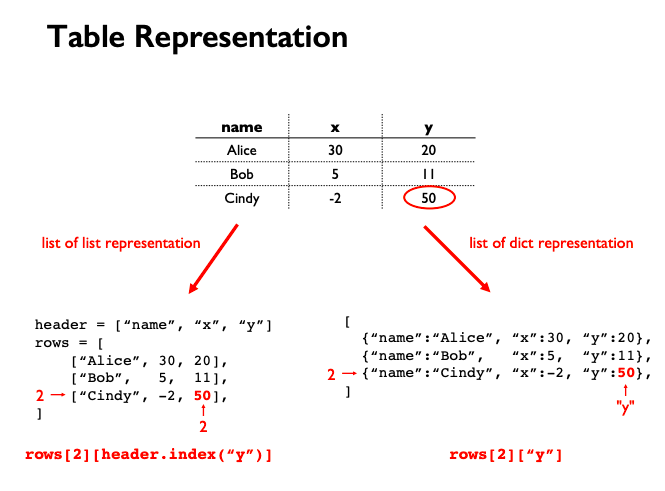
</div>

Steps (build a list of dictionaries)
- Start with an empty list
- Each row of data is one dictionary
    - keys are the column names
    - values are the data in each cell

Why put data in table form?
- It seems redundant, but is used often in Web apps for storing info.
- Its a little easier to access subsets of the data without worrying about the header index method.

In [18]:
# Let's put the student survey data into a list of dictionaries
cs220_header

['Lecture',
 'Age',
 'Primary major',
 'Other majors',
 'Zip Code',
 'Pizza topping',
 'Pet owner',
 'Runner',
 'Sleep habit',
 'Procrastinator']

In [19]:
def transform(header, data):
    """
    Transform data into a list of dictionaries
    """
    dict_list = [] #should be defined outside the for loop, because it stores the entire data
    
    for row in cs220_data:
        new_row = {} #should be defined inside the for loop, because it represents one row as a dictionary
        for i in range(len(cs220_header)):
            new_row[cs220_header[i]] = row[i]
        dict_list.append(new_row)
    return dict_list
        
transformed_data = transform(cs220_header, cs220_data)

### What lecture is the first student part of?

In [20]:
print(transformed_data[0]["Lecture"])

LEC002


### What is the primary major of the last student?

In [21]:
print(transformed_data[-1]["Primary major"])

Computer Science


## Nesting part 3: Dictionary of Dictionaries

https://www.w3schools.com/python/python_dictionaries_nested.asp

In [22]:
# dict of dicts example:

nested_english_dict = {
    "shenanigans": {
        "definition": "silly or high-spirited behavior; mischief.",
        "usage": "widespread financial shenanigans had ruined the fortunes of many",
        "fun_to_say": 7 # on a scale of 1-10
    },
    "bamboozle": {
        "definition": "fool or cheat (someone).",
        "usage": "Tom Sawyer bamboozled the neighborhood boys into painting for him",
        "fun_to_say": 8 # on a scale of 1-10
    },
    "gubbins": {
        "definition": "(objects) of little to no value.",
        "usage": "I cleared all the gubbins off my desk before I started working",
        "fun_to_say": 10 # on a scale of 1-10
    },
    "malarkey": {
        "definition": "meaningless talk; nonsense.",
        "usage": "don't give me that malarkey",
        "fun_to_say": 5 # on a scale of 1-10
    },
    "gnarly": {
        "definition": "gnarled.",
        "usage": "twisted trees and gnarly roots",
        "fun_to_say": 2 # on a scale of 1-10
    }
}

# TODO: pick a word and add an inner dict

### How can we use "bamboozle"?

In [23]:
nested_english_dict["bamboozle"]["usage"]

'Tom Sawyer bamboozled the neighborhood boys into painting for him'

### Create a list of words with fun_to_say score greater than 7.

In [24]:
fun_to_say_words = []

for word in nested_english_dict:
    fun_to_say = nested_english_dict[word]["fun_to_say"]
    if fun_to_say > 7:
        fun_to_say_words.append(word)

fun_to_say_words

['bamboozle', 'gubbins']